<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/Iron_Ore_Froth_Flotation_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Quality Prediction of Iron Ore Mining Flotation Process**

**Brief Information About Mining Flotation Process**

Froth flotation is an important concentration process. This process can be used to separate any two different particles and operated by the surface chemistry of the particles. In flotation, bubbles are introduced into a pulp and the bubbles rise through the pulp. In the process, hydrophobic particles become bound to the surface of the bubbles. The driving force for this attachment is the change in the surface free energy when the attachment occurs. These bubbles rise through the slurry and are collected from the surface. To enable these particles to attach, careful consideration of the chemistry of the pulp needs to be made.

In the iron ore mining processing, in order to achieve the desired quality in the froth flotation processing plant, stakeholders rely on conventional laboratory test technique which usually takes more than two hours to ascertain the two variables of interest. Such a substantial dead time makes it difficult to put the inherent stochastic nature of the plant system in steady-state.
Thus, the present study aims to evaluate the feasibility of using machine learning algorithms to predict the percentage of silica concentrate (SiO2) in the froth flotation processing plant in real-time. The predictive model has been constructed using iron ore mining froth flotation system dataset obtain from Kaggle. Different feature selection methods including Random Forest and backward elimination technique were applied to the dataset to extract significant features. The selected features were then used in Multiple Linear Regression, Random Forest models and the prediction accuracy of all the models have been evaluated and compared with each other.

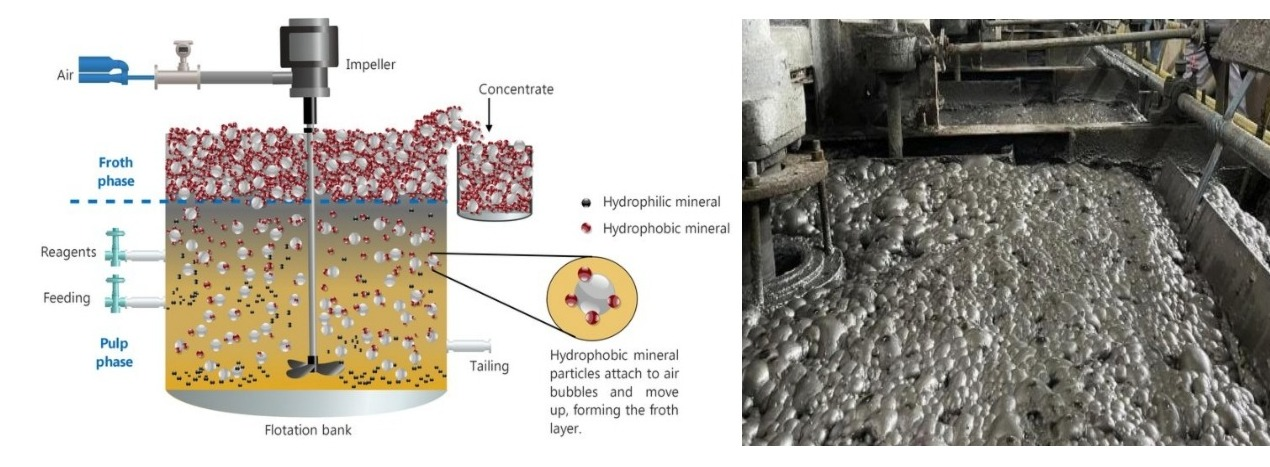

The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as we reduce silica in the ore concentrate).

What are we looking for?

1.Can you accurately predict SiO2 so we can have a chance to act on it before lab tests come back?

2.What are the most important variables and how do they influence the level of SiO2?

Hints: Structure the feed and flotation data set into training and test sets. Consider rolling it up to one-hour frequency data. Assess the results on the scoring data set

Can we operate better than we have in the past? (Formulate an optimization problem to reduce the silica content in output concentrate)

What values should we choose for controllable variables? (Run it over a test set in the past)

What is the impact we can expect? (Show a sample recommendation in the past test set and assess the impact - How much silica% could your optimizer reduce?)

What you will be evaluated on:

1. Complete notebook/ script in any language of preference

2. Presentation/ Excel report highlighting the following things –

a. Name of the algorithm used for the prediction

b. All the parameters of the algorithm used

c. Feature importance along with their description

d. Model evaluation metrics on the out of time dataset (R2, MAPE, Times series plot of prediction and actuals)

e. Interpret the model results and the variable impact on the target


You get brownie points for the following:

1. Formulation of the optimization problem

2. Presentation / Excel report highlighting the following things

   a. Constraints for the optimization problem

   b. Method used for the optimization

 
d.High level observation from the recommendations, if any

Please submit your output .csv file exactly as in the 'SubmissionFormat.csv' file given in the zip folder.

You are also expected to upload a PDF/PPT file along with your source code. Zip these into a folder and upload it in the 'Upload Source code' section of the platform

Evaluation Metric - RMSE

**Inspiration**:

I have been working in this dataset for at least six months and would like to see if the community can help to answer the following questions:

- Is it possible to predict % Silica Concentrate every minute?

- How many steps (hours) ahead can we predict % Silica in Concentrate? This would help engineers to act in predictive and optimized way, mitigatin the % of iron that could have gone to tailings.

- Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?

**Project Objective:**

To predict % silica in product after flotation process. The expected outcome for this project are as follows:

- Improve reliability of process
- Reduce waste water from process leading to environment friendly
- Reduce cost of laboratory testing as soft sensor

**Major Conclusion:**
- Selected the random forest model as the primary model for deployment
the performance of selected model as belows:
- Root Mean Square Error: 0.185
- R2: 0.853

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [75]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Flotation/

df = pd.read_csv("Flotation_Plant.csv")
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

**Column Definitions**:

- **Date**: Data collection time.
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore.
- **Amina Flow**: Collector chemical for Silica containing ore.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step.
- **Ore Pulp pH**: pH.
- **Ore Pulp Density**: The solid percent of ore fed to flotation columns.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: The amount of air fed to the flotations columns to frothing.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Showing float thickness of flotation columns.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore

In [77]:
df.shape

(737453, 24)

In [78]:
df_datatype = pd.concat([df.dtypes, df.nunique(),
                         round(df.nunique()*100/len(df), 2),
                         df.isnull().sum(),
                         round(df.isnull().sum()*100/len(df),2)],
                        axis=1)

df_datatype.columns = ['data type',
                       'No. of categories',
                       'No. of categories %',
                       'missing values',
                       'missing values %']

df_datatype.sort_values(by='missing values %',
                        ascending=False, inplace=True)
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
date,object,4097,0.56,0,0.0
% Iron Feed,object,278,0.04,0,0.0
% Iron Concentrate,object,38696,5.25,0,0.0
Flotation Column 07 Level,object,295667,40.09,0,0.0
Flotation Column 06 Level,object,301502,40.88,0,0.0
Flotation Column 05 Level,object,276051,37.43,0,0.0
Flotation Column 04 Level,object,309264,41.94,0,0.0
Flotation Column 03 Level,object,322315,43.71,0,0.0
Flotation Column 02 Level,object,331189,44.91,0,0.0
Flotation Column 01 Level,object,299573,40.62,0,0.0


In [79]:
df.duplicated().sum()

1171

In [80]:
#drop unnecessary date column
df2=df.drop('date',axis=1)

# Transform , to . and object type from str to float
for col in df2.columns:
    df2[col]=df2[col].str.replace(',','.').astype(float)

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [82]:
from sklearn.preprocessing import StandardScaler
# create the scaler object
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(df2)
# create a new DataFrame from the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df2.columns)


In [83]:
df_scaled.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,-0.212252,0.342021,0.123757,0.759497,-0.192311,0.771979,0.860958,-1.044447,-0.793549,-1.068217,...,-1.390678,-0.479708,-0.699782,-0.705365,0.253142,0.910896,0.182824,1.205337,1.662667,-0.903346
1,-0.212252,0.342021,0.127772,0.831085,-0.020142,0.774046,0.860958,-1.027399,-0.883202,-1.058202,...,-1.456600,-0.521726,-0.726326,-0.652429,0.302470,0.841198,0.177839,0.907674,1.662667,-0.903346
2,-0.212252,0.342021,0.143449,0.875906,0.215431,0.776113,0.860958,-1.026656,-0.971364,-1.077426,...,-1.488794,-0.526695,-0.419167,-0.641351,0.319922,0.699814,0.199027,0.442280,1.662667,-0.903346
3,-0.212252,0.342021,0.146658,0.882603,0.037179,0.778439,0.860958,-1.020714,-0.752022,-1.086670,...,-1.381505,-0.517528,-0.503137,-0.586625,0.282033,0.546033,0.086232,0.078309,1.662667,-0.903346
4,-0.212252,0.342021,0.135409,0.767532,0.275844,0.780506,0.860958,-1.011059,-0.830001,-1.092063,...,-1.458902,-0.517528,-0.544217,-0.535856,0.363301,0.441781,0.152912,0.054867,1.662667,-0.903346


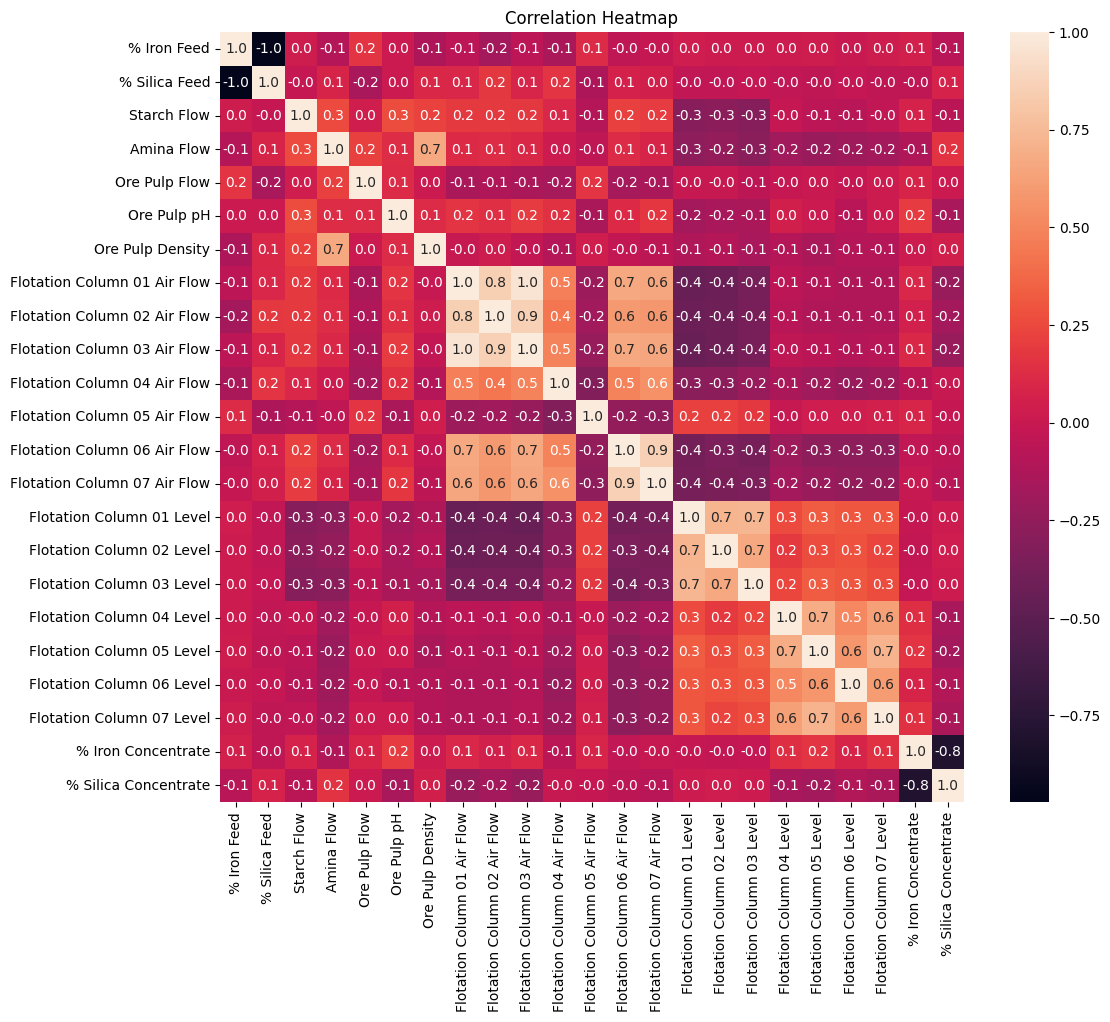

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), fmt='.1f', annot=True)
plt.title('Correlation Heatmap')
plt.show()


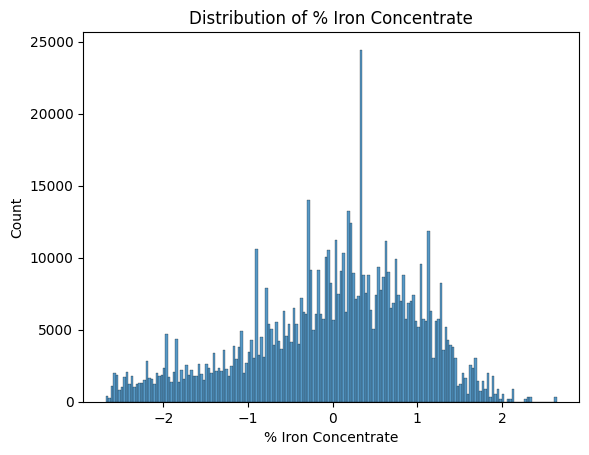

In [88]:
# Visualize the distribution of the target variable (% Iron Concentrate)
sns.histplot(data=df_scaled, x='% Iron Concentrate')
plt.title('Distribution of % Iron Concentrate')
plt.show()

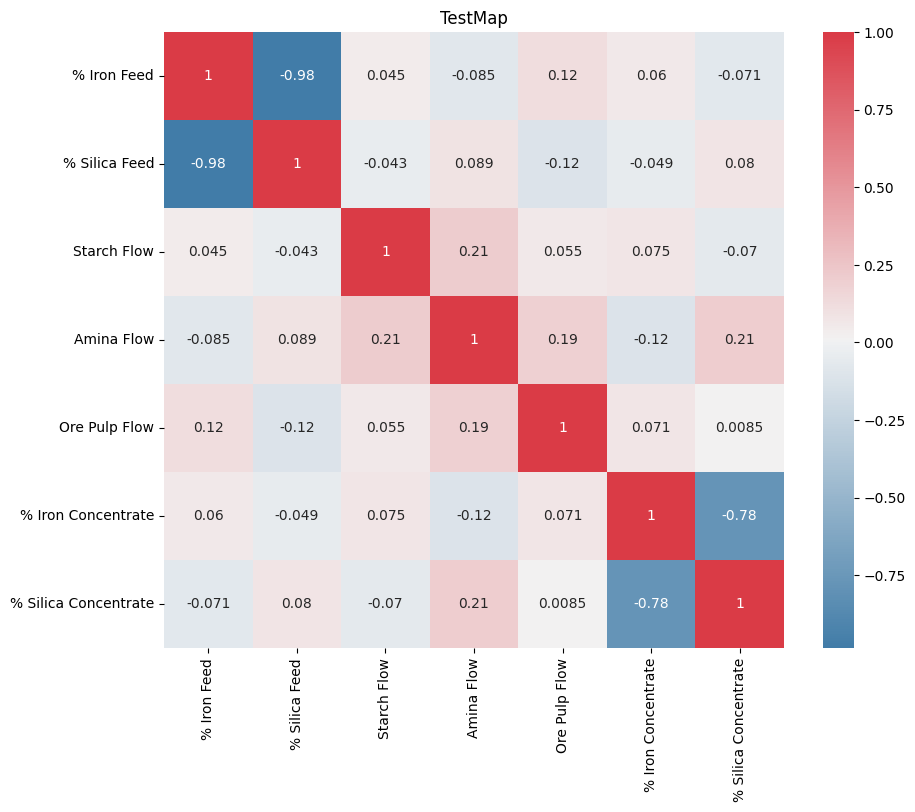

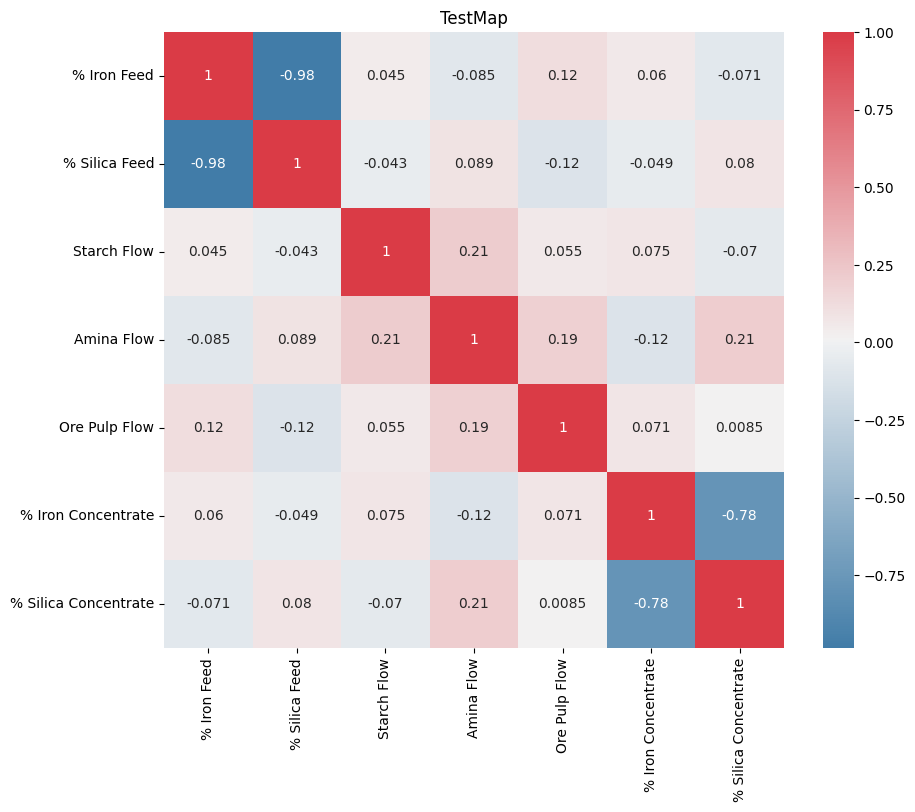

In [90]:
def heatmap_corrplot(df_scaled, columns, corr_method="pearson", title="", file=None):
  # Calculate the correlations between columns
    corr = df_scaled[columns].corr(method=corr_method)
    # Create the heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, annot=True, ax=ax)
    # Set the plot title
    ax.set_title(title)
    # Save the plot if file is specified
    if file is not None:
        fig.savefig(file, dpi=300, bbox_inches='tight')
    plt.show()
    return fig

heatmap_corrplot(df_scaled, df_scaled.columns[[0, 1, 2, 3, 4, -2, -1]], corr_method="spearman", title="TestMap")

In [103]:
# with and without iron concentrate
target = '% Silica Concentrate'
y = df_scaled[target]
X = df_scaled.drop([target , '% Iron Concentrate'] , axis = 1)

Xi = df_scaled.drop(target , axis = 1) # with iron

In [98]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.70)
Xi_train , Xi_test , yi_train , yi_test = train_test_split(Xi , y , train_size = 0.70)

In [99]:
model1 = LinearRegression()
model2 = LinearRegression()

In [100]:
model1.fit(X_train , y_train)
print(f'model without iron R^2 score: {model1.score(X_test , y_test)}')

model without iron R^2 score: 0.15133814391559286


In [101]:
model2.fit(Xi_train , yi_train)
print(f'model without iron R^2 score: {model2.score(Xi_test , yi_test)}')

model without iron R^2 score: 0.6801717758334171


In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=55,test_size=0.3)

In [106]:
X.shape, y.shape

((737453, 21), (737453,))

array([[<Axes: title={'center': 'Starch Flow'}>,
        <Axes: title={'center': 'Amina Flow'}>],
       [<Axes: title={'center': 'Ore Pulp Flow'}>,
        <Axes: title={'center': 'Ore Pulp pH'}>],
       [<Axes: title={'center': 'Ore Pulp Density'}>, <Axes: >]],
      dtype=object)

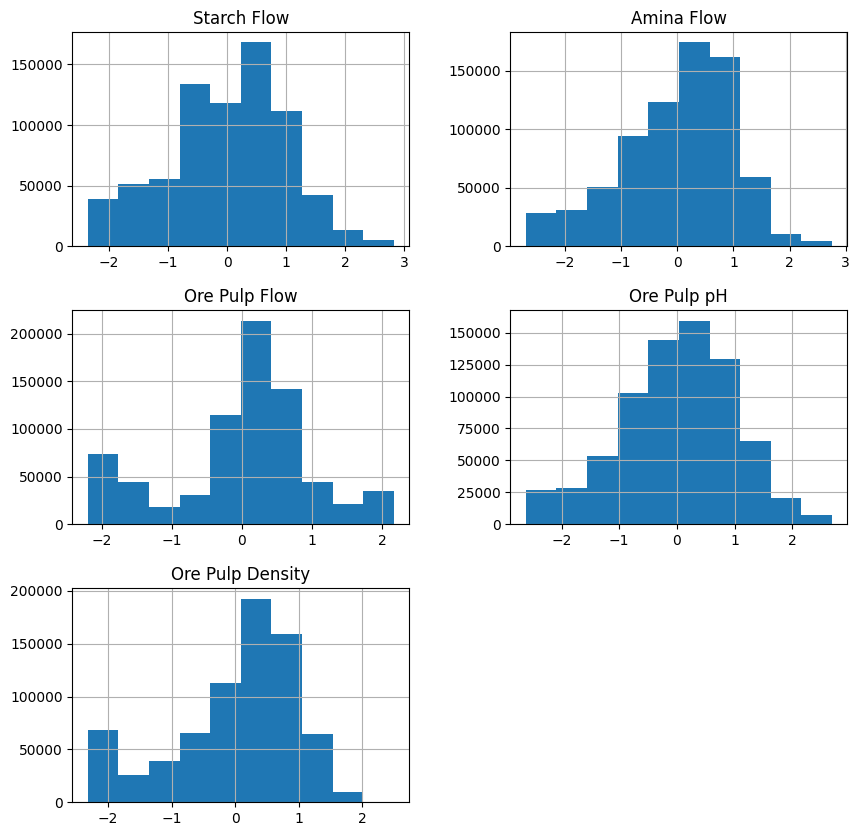

In [114]:
df_scaled.hist(column=['Starch Flow',
                       'Amina Flow',
                       'Ore Pulp Flow',
                       'Ore Pulp pH',
                       'Ore Pulp Density'],
                       grid=True,figsize=(10,10))

array([[<Axes: title={'center': 'Flotation Column 01 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 02 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 03 Air Flow'}>],
       [<Axes: title={'center': 'Flotation Column 04 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 05 Air Flow'}>,
        <Axes: title={'center': 'Flotation Column 06 Air Flow'}>],
       [<Axes: title={'center': 'Flotation Column 07 Air Flow'}>,
        <Axes: >, <Axes: >]], dtype=object)

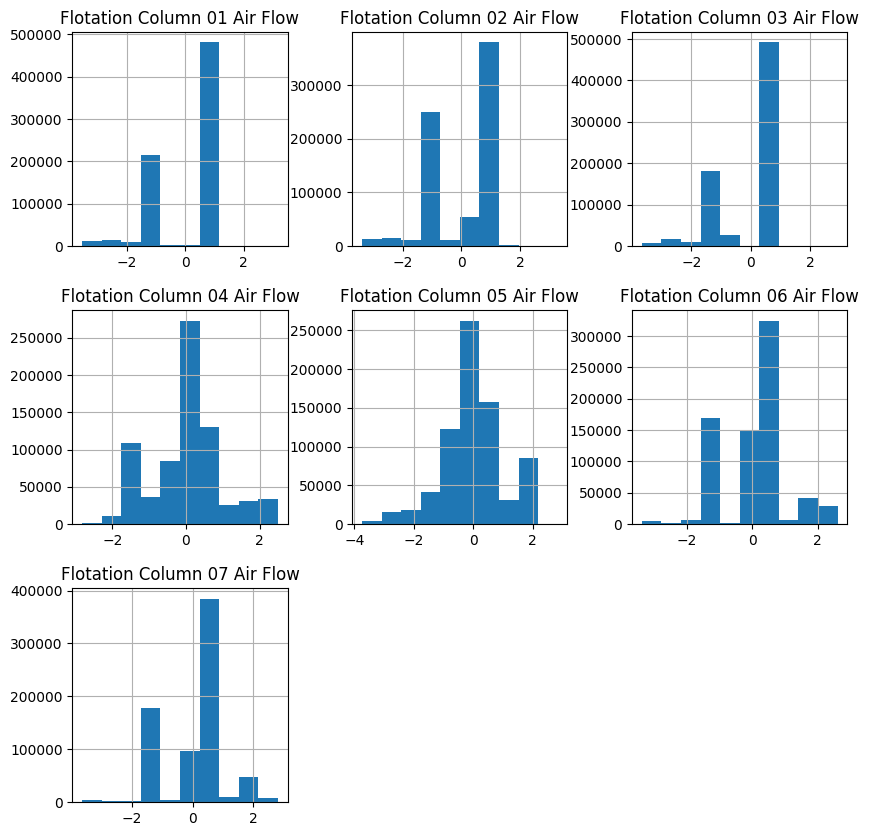

In [115]:
df_scaled.hist(column=['Flotation Column 01 Air Flow',
                       'Flotation Column 02 Air Flow',
                       'Flotation Column 03 Air Flow',
                       'Flotation Column 04 Air Flow',
                       'Flotation Column 05 Air Flow',
                       'Flotation Column 06 Air Flow',
                       'Flotation Column 07 Air Flow',],
                       grid=True,figsize=(10,10))

array([[<Axes: title={'center': 'Flotation Column 01 Level'}>,
        <Axes: title={'center': 'Flotation Column 02 Level'}>,
        <Axes: title={'center': 'Flotation Column 03 Level'}>],
       [<Axes: title={'center': 'Flotation Column 04 Level'}>,
        <Axes: title={'center': 'Flotation Column 05 Level'}>,
        <Axes: title={'center': 'Flotation Column 06 Level'}>],
       [<Axes: title={'center': 'Flotation Column 07 Level'}>, <Axes: >,
        <Axes: >]], dtype=object)

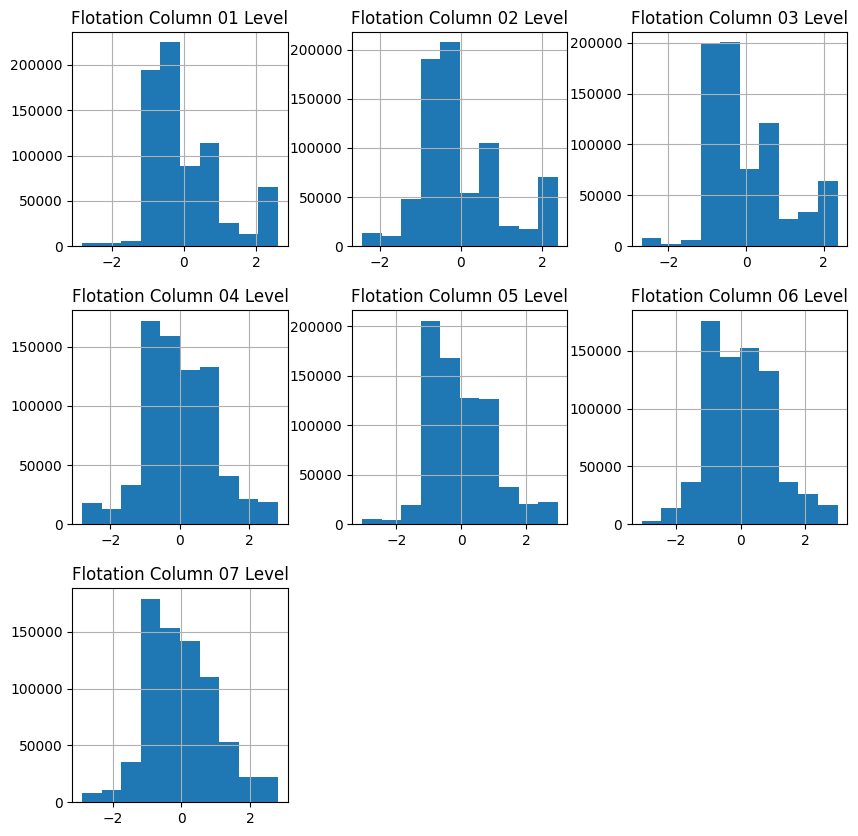

In [116]:
df_scaled.hist(column=['Flotation Column 01 Level',
                       'Flotation Column 02 Level', 'Flotation Column 03 Level',
                       'Flotation Column 04 Level', 'Flotation Column 05 Level',
                       'Flotation Column 06 Level', 'Flotation Column 07 Level'],
                       grid=True,figsize=(10,10))

array([[<Axes: title={'center': '% Iron Feed'}>,
        <Axes: title={'center': '% Silica Feed'}>]], dtype=object)

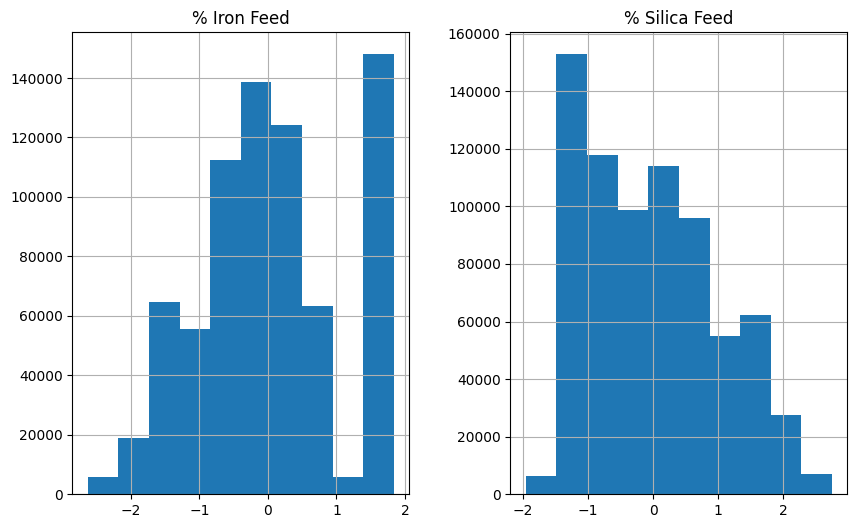

In [117]:
df_scaled.hist(column=['% Iron Feed', '% Silica Feed'],
                       grid=True,figsize=(10,6))